# Background

[SymPy](http://docs.sympy.org/latest/index.html) is a Python library for performing symbolic computation. SymPy can simplify expressions, compute derivatives, integrals, and limits, solve equations, work with matrices, and much more, and do it all symbolically. It includes modules for plotting, printing (like 2D pretty printed output of math formulas, or $\LaTeX$), code generation, physics, statistics, combinatorics, number theory, geometry, logic, and more. 

This notebook is primarily adapted from a mixture of the [official SymPy tutorial](http://docs.sympy.org/latest/tutorial/index.html), and [Johansson's](https://github.com/jrjohansson) excellent [Scientific Python Lectures](https://github.com/jrjohansson/scientific-python-lectures). Johansson's lectures are published under a [Creative Commons Attribution 3.0 Unported License](https://creativecommons.org/licenses/by/3.0/). After completing this notebook, both the SymPy tutorial and the Scientific Python lectures represent excellent next steps.

# Table of Contents
- [Getting Started](#Getting-Started)
- [A First Example](#A-First-Example)
- [Predefined Symbols](#Predefined-Symbols)
- [Variables](#Variables)
- [Basic Operations](#Basic-Operations)
- [Algebra](#Algebra)
- [Calculus](#Calculus)
- [Linear Algebra](#Linear-Algebra)
- [Solvers](#Solvers)

# Getting Started
To get started, we import all of SymPy into the global namespace. Generally this is a bad idea, but it makes this notebook simpler since we don't need preface everything with `sympy.`.

Secondly, we call `init_printing()` so SymPy will give us nice $\LaTeX$ formatted output with unicode string support.

In [1]:
from sympy import *
init_printing(use_unicode=True)

Finally, let's get the Notebook to render all variables and expressions that appear on their own line, rather than just those on the final line of a code cell. We also load some other libraries that are used further on.

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# A First Example
Let's define a symbolic expression, representing the mathematical expression $x+2y$. First we need to define the symbols. A feature of SymPy is that all variables must be defined prior to use (a number of frequently used symbols are predefined, e.g. $\pi$).

In [3]:
x, y = symbols('x y')

Now we can define the expression $x + 2y$:

In [4]:
expr = x + 2*y

Note that we defined the expression using ordinary Python syntax, but instead of evaluating to a numeric result, `expr` is a symbolic result:

In [7]:
expr

Now that we have an expression, we can manipulate it:

In [6]:
expr + 1
expr - x

Notice that `expr - x` expands to $x + 2y - x$ and that it was automatically simplified to $2y$. This is *not* the general rule in SymPy. Most of the time, expressions are not simplified unless you explicitly request it. Consider:

In [8]:
x*expr

The result was not simplified. SymPy provides functions to expand and factor expressions:

In [9]:
expanded_expr = expand(x*expr)
expanded_expr

In [10]:
factor(expanded_expr)

# Predefined Symbols
SymPy provides definitions for many symbols. Key ones are:

## Pi ($\pi$)
The $\pi$ constant:

In [11]:
# Pi can be used symbolically
pi

# and evaluated to a specific number of significant digits
pi.evalf(5)

## Euler's Number ($e$)
Use `E`:

In [12]:
E

E.evalf(5)

To use $e$ when building an expression, you can either use `E` or `exp()`:

In [13]:
E**(-x)

exp(-x)

## The Imaginary Unit ($i = \sqrt{-1}$)
Use `I`. Note this is contrary to the Python use of `j`:

In [14]:
# sympy expression
type(3 + 2*I)

# Python complex number
type(3 + 2j)

sympy.core.add.Add

complex

Sympy can handle Python complex values, but they are treated as floating point even when defined with integers:

In [15]:
expand((3 + 2*I)**2)

expand((3 + 2j)**2)

## Infinity
Use `oo`: two lower-case `o` symbols side by side:

In [16]:
oo

There is no symbol for $-\infty$, but you can represent it two ways:

In [17]:
-oo
S.NegativeInfinity

For complex infinity, use `S.ComplexInfinity` or `zoo`:

In [18]:
zoo
S.ComplexInfinity

## The Empty Set

In [19]:
S.EmptySet

# Variables
As mentioned, SymPy variables need to be declared in advance. Symbols can be created with the `symbols()` factory function, or directly with the `Symbol` class. Using the factory is more concise but the `Symbol` class gives more control by allowing the specification of assumptions.

`symbols()` takes a string of variable names separated by spaces or commas, and creates `Symbol` objects out of them. We can then assign these to variable names.

In [20]:
a, b, c = symbols('a b c')
type(a)

sympy.core.symbol.Symbol

Note that apart from concerns of readability and convention, there is no connection between the name of a Symbol and the Python variable it is assigned to:

In [21]:
x = Symbol('y')
x

In [22]:
x = Symbol('x', real=True)
x.is_imaginary

False

In [23]:
x = Symbol('x', positive=True)
x > 0

## Complex Numbers
The imaginary unit is denoted by `I` in SymPy (contrast this to core Python where `j` is used).

In [24]:
1 + I
I**2
(x * I + 1)**2

## Numeric Types
SymPy can represent numbers as floating point ([`Float` class](http://docs.sympy.org/latest/modules/core.html#float)), rational ([`Rational` class](http://docs.sympy.org/latest/modules/core.html#rational)), integer (also using the `Rational` class):

In [25]:
Float(10.4)
Float(1e2)
Rational(1)
Rational(22, 7)
Rational(1e2)

In [26]:
r1 = Rational(4,5)
r2 = Rational(5,4)
r1 + r2
r1 / r2
r1 * r2

# Basic Operations
## Substitution

To evaluate an algebraic expression, substituting values for the variables, you can use the `subs()` method, passing a dictionary that maps each variable to be substituted to a value:

In [27]:
x, y = symbols('x y')
expr = 2*x + 3*y**2
expr
expr.subs({x: 3, y: 1})

Note that not all values need to be substituted, and that you can substitute other symbols:

In [28]:
expr.subs({y: x**3})

## Evaluation
SymPy uses a library for artitrary precision as numerical backend, and has predefined SymPy expressions for a number of mathematical constants, such as: `pi`, `e`, `oo` for infinity.

To evaluate an expression to a floating point number we can use the `evalf` function (or `N`). It takes an argument `n` which specifies the number of significant digits. Let's compute the first 100 digits of $\pi$:

In [29]:
pi
pi.evalf(n=100)

To numerically evaluate an expression with a Symbol at a point, we might use `subs` followed by `evalf`, but it is more efficient and numerically stable to pass the substitution to `evalf` using the subs flag, which takes a dictionary of Symbol: point pairs.

In [30]:
expr = cos(2*x)
expr.evalf(subs={x: 2.4})

Sometimes there are roundoff errors smaller than the desired precision that remain after an expression is evaluated. Such numbers can be removed at the user’s discretion by setting the chop flag to True.

In [31]:
one = cos(1)**2 + sin(1)**2
one
one.evalf()
(one - 1).evalf()
(one - 1).evalf(chop=True)

## Converting Strings to SymPy Expressions
The `sympify()` function can be used to convert strings into SymPy expressions.

<span style="color:red">
**sympify uses eval. Don’t use it on unsanitized input, as it could lead to the execution of arbitrary Python code.**
</span>

In [32]:
str_expr = "x**2 + 3*x - 1/2"
sympify(str_expr)

## lambdify
`subs` and `evalf` are good if you want to do simple evaluation, but if you intend to evaluate an expression at many points, there are more efficient ways. For example, if you wanted to evaluate an expression at a thousand points, using SymPy would be far slower than it needs to be, especially if you only care about machine precision. Instead, you should use libraries like NumPy and SciPy.

The easiest way to convert a SymPy expression to an expression that can be numerically evaluated is to use the [`lambdify()`](http://docs.sympy.org/latest/modules/utilities/lambdify.html?highlight=lambdify#sympy.utilities.lambdify.lambdify) function. `lambdify` acts like a lambda function, except it converts the SymPy names to the names of the given numerical library, usually NumPy.

Let's examine evaluating a simple quadratic expression over a range of values by explicitly calling `evalf` for each value with a list comprehension.

First, create the symbols and expression to represent $2x^2 + c$, where $c$ will be a constant (used simply to indicate how to specify parameters to `lambdify`).

In [33]:
x, c = symbols('x c')
expr = 2*x**2 + c
expr

Now, create the values we will evaluate (a range for $x$ and a constant for $c$):

In [34]:
x_vec = np.arange(0, 10, 0.01)
c_scalar = -30

Finally, evaluate the range of values and plot the result:

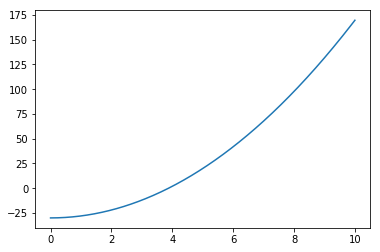

In [35]:
y_vec = np.array([expr.evalf(subs={x: xx, c: c_scalar}) for xx in x_vec])
plt.plot(x_vec, y_vec);

Not bad, but how long does that take?

In [36]:
%%timeit
y_vec = np.array([expr.evalf(subs={x: xx, c: -50}) for xx in x_vec])

283 ms ± 12.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Now we will use `lambdify()` to create a numpy version of the function.
- The first argument is a tuple of the arguments that the generated function will accept, and that will be substituted during function evaluation. 
- The second argument is the SymPy expression.
- The third argument is a string indicating which math module should be used. It accepts “math”, “mpmath”, “numpy”, “numexpr”, “sympy”. We only look at numpy here as it is the most common option. For information on using the other choices see the [SymPy documentation](http://docs.sympy.org/latest/modules/utilities/lambdify.html?highlight=lambdify#sympy.utilities.lambdify.lambdify).

In [37]:
f = lambdify((x, c), expr, 'numpy')
f

<function numpy.<lambda>>

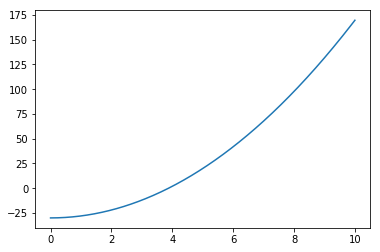

In [38]:
y_vec = f(x_vec, c_scalar)
plt.plot(x_vec, y_vec);

And how long does it take?

In [39]:
%%timeit
y_vec = f(x_vec, c_scalar)

6.75 µs ± 255 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


Note that the lambdified expression can still work symbolically as well:

In [40]:
x_vec = np.array([0, 1, 2])
x, y, c = symbols('x y c')

# substitute numeric values of x but retain c.
# The result will be a numpy array of sympy expressions
f(x_vec, c)

# substitute c=2 for a single value of x.
# The result will be a single expression as the function does not return an array for a single result
f(x, 2)

# You can even substitute expressions, again getting a numpy array of expressions back.
x_vec = np.array([x, x**2, x*y])
y = f(x_vec, 2)
y

array([c, c + 2, c + 8], dtype=object)

array([2*x**2 + 2, 2*x**4 + 2, 2*x**2*y**2 + 2], dtype=object)

Note that the expressions didn't render with $\LaTeX$ while contained in the numpy array. They are still full expressions though:

In [41]:
y[-2]

# Algebra
A common use of a CAS is performing algebraic manipulations on expressions. We will look at some common operations here.

First though, make sure the symbols we need are defined:

In [42]:
a, b, x, y = symbols('a b x y')

## Expand

In [43]:
expr = (x+1)*(x+2)*(x+3)

In [44]:
expand(expr)

The `expand()` function takes a number of arguments that control the type of expansions that will be performed. Consider:

In [45]:
expr = sin(a+b)
expr

In [46]:
expand(expr)

In [47]:
expand(expr, trig=True)

## Factor
Sympy can also factor algebraic expressions.

Let's try a round-trip through `expand()` and `factor()`:

In [48]:
expr = (x+1)*(x + 3)*(2*x - 1)
expr

expand(expr)

factor(expand(expr))

## Simplification
SymPy has dozens of functions to perform various kinds of simplification. There is also one general function called `simplify()` that attempts to apply all of these functions in an intelligent way to arrive at the simplest form of an expression.

In [49]:
simplify(sin(x)**2 + cos(x)**2)

In [50]:
simplify((x**3 + x**2 - x - 1)/(x**2 + 2*x + 1))

In [51]:
simplify(sin(x) / cos(x))

However, `simplify` may not always give the desired result. It simply applies all possible simplification operations in turn, and then uses heuristics to pick the *simplest* result. This may not be the result you are looking for.

For example, consider simplifying $x^2 + 2x + 1$ into $(x+1)^2$:

In [52]:
expr = x**2 + 2*x + 1
expr

simplify(expr)

The expression hasn't changed! According to the heuristics, it is already in the simplest form.

However, it can be factored explicitly:

In [53]:
factor(expr)

`simplify` can also be relatively slow on complex functions.

So if you already know what type of simplification you require, using the specific function can give better results. But if you are not sure what you need, then `simplify` is ideal for exploration in a notebook. The results may then lead to more specific simplifications.

We have already looked at `expand()` and `factor()` which are two of the commonly used simplification functions. Let's look at some others now.

## apart
`apart()` performs a [partial fraction decomposition](https://en.wikipedia.org/wiki/Partial_fraction_decomposition) on a rational expression:

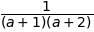

In [54]:
f1 = 1/((a+1)*(a+2))
f1

In [55]:
apart(f1)

## together
`together()` takes an expression and puts it together by denesting and combining rational subexpressions. No heroic measures are taken to minimize degree of the resulting numerator and denominator. To obtain completely reduced expression use `cancel()`.

By definition, `together()` is a complement to `apart()`, so `apart(together(expr))` should return `expr` unchanged. Note however, that `together()` uses only symbolic methods, so it might be necessary to use `cancel()` to perform algebraic simplification and minimise degree of the numerator and denominator.

We will look at `cancel()` next.

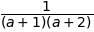

In [56]:
together(apart(f1))

## cancel
`cancel()` will take any rational function and put it into the standard canonical form, $\frac{p}{q}$, where $p$ and $q$ are expanded polynomials with no common factors, and the leading coefficients of $p$ and $q$ are integers.

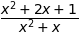

In [57]:
expr = ((x**2 + 2*x + 1)/(x**2 + x))
expr

In [58]:
cancel(expr)

## Trigonometric Simplification
We have already seen use of the `trig=True` argument to `simplify()`, but there are a few additional functions for performing specific trigonometric simplifications. It works much like `simplify()`, by applying various trigonometric identities to the input expression, and then using a heuristic to return the *best* one.

### trigsimp
`trigsimp()` will simplify trigonometric expression using the standard trigonometric identities:

In [ ]:
trigsimp(sin(x)**2 + cos(x)**2)

In [ ]:
trigsimp(sin(x) * tan(x) / sec(x))

### expand_trig
Trigonometric functions can also be expanded with `expand_trig()`:

In [ ]:
expr = sin(x + y)
expr

In [ ]:
expand_trig(expr)

In [ ]:
trigsimp(expand_trig(expr))

# Calculus
This section covers how to do basic calculus tasks such as derivatives, integrals, limits, and series expansions in SymPy.

## Differentiation
To take [derivatives](http://mathworld.wolfram.com/Derivative.html), use the `diff()` function. The first argument is the expression to take the derivative of, and the second argument is the symbol by which to take the derivative. So to calculate $\frac{d}{dx}x^2$:

In [ ]:
diff(x**2)

For expressions of more than one symbol, you can pass a second argument indicating the variable/s to use:

In [ ]:
expr = x**2 + y**3
# Differentiate with respect to x
diff(expr, x)

# Differentiate with respect to y
diff(expr, y)

Higher order derivatives can be obtained by passing a third argument indicating the order:

In [ ]:
diff(expr, y, 2)

## Integration
To compute an [integral](http://mathworld.wolfram.com/Integral.html), use the `integrate()` function. There are two kinds of
integrals, definite and indefinite. 

### Indefinite Integrals
To compute an [indefinite integral](http://mathworld.wolfram.com/IndefiniteIntegral.html) just pass the variable after the expression. For example, to calculate $\int x^2 dx$:

In [ ]:
integrate(x**2, x)

In [ ]:
integrate(cos(x))

Note that SymPy does not include the constant of integration. If you want it, you can add one yourself, or rephrase your problem as a differential equation and use `dsolve()` to solve it, which does add the constant. `dsolve()` is not covered in this notebook, so please refer to the SymPy tutorial on solving [differential equations](http://docs.sympy.org/latest/tutorial/solvers.html#tutorial-dsolve).

Note that as for `diff()`, for expressions of a single variable, the second parameter may be omitted:

In [ ]:
integrate(x**2)

### Definite Integrals
To compute a definite integral, pass a tuple as the second argument to `integrate()`. The tuple has the form  `(integration_variable, lower_limit, upper_limit)`. For example, to compute $\int_{0}^{\infty}e^{-x}\space dx$:

In [ ]:
integrate(exp(-x), (x, 0, oo))

### Multiple Integrals
Multiple integrals can be performed for both definite and indefinite integrals using the `integrate()` function. Just pass multiple arguments. For example, the indefinite integral of $e^{-x^2 - y^2}$ with respect to both $x$ and $y$:

In [ ]:
expr = exp(-x**2 - y**2)
expr
integrate(expr, x, y)

Note that `erf()` is the [Gauss error function](http://docs.sympy.org/latest/modules/functions/special.html?highlight=erf#sympy.functions.special.error_functions.erf).

Now the definite integral: 

In [ ]:
integrate(expr, (x, -oo, oo), (y, -oo, oo))

## Sums and Products
Sums can be calculated with the `Sum()` function. Similarly to `integrate()`, the second argument is a tuple `(integration_variable, lower_limit, upper_limit)`.

**Note the upper-case `Sum`. This is to avoid conflict with the built-in Python function `sum()`**

In [ ]:
n = symbols('n')
Sum(1/n**2, (n, 1, 10))

Like all expressions, they can be evaluated:

In [ ]:
Sum(1/n**2, (n, 1, 10)).evalf()
Sum(1/n**2, (n, 1, oo)).evalf()

Products work in a similar manner using the `Product()` function:

In [ ]:
Product(n, (n, 1, 10))
Product(n, (n, 1, 10)).evalf()

## Limits
SymPy can compute symbolic limits with the limit function. The syntax to compute $\lim_{x\to x_0} f(x)$ is `limit(f(x), x, x0)`.

In [ ]:
limit(sin(x) / x, x, 0)

`limit` should be used instead of `subs` whenever the point of evaluation is a singularity. Even though SymPy has objects to represent $\infty$ using them for evaluation is not reliable because they do not keep track of things like rate of growth. Also, things like $\infty - \infty$ and $\frac{\infty}{\infty}$ return `nan` (not-a-number). For example:

In [ ]:
expr = x**2 / exp(x)
expr
expr.subs(x, oo)
limit(expr, x, oo)

## Series Expansion
SymPy can compute asymptotic series expansions of functions around a point. To compute the expansion of $f(x)$ around the point $x=x0$ with terms of order $x^n$, use `f(x).series(x, x0, n)`. `x0` and `n` default to `x0=0` and `n=6`.

In [ ]:
expr = exp(sin(x))
expr.series(x, 0, 4)

The $O(x^4)$ term at the end represents the Landau order term at $x=0$ (not to be confused with big O notation used in computer science, which generally represents the Landau order term at $x=\infty$). It means that all $x$ terms with power greater than or equal to $x^4$ are omitted. Order terms can be created and manipulated outside of series. They automatically absorb higher order terms. If you do not want the order term, it can be removed with `removeO()`:

In [ ]:
expr.series(x, 0, 4).removeO()

Series can also be expanded around other values for $x$:

In [ ]:
expr.series(x, 1, 4)

# Linear Algebra

## Matricies
[Matricies](http://docs.sympy.org/dev/modules/matrices/matrices.html#) are defined by the `Matrix` class:

In [ ]:
m11, m12, m21, m22 = symbols('m11, m12, m21, m22')
b1, b2 = symbols('b1, b2')

In [ ]:
A = Matrix([[m11, m12], [m21, m22]])
A

In [ ]:
C = Matrix([[1, 2], [3, 4]])
C

In [ ]:
b = Matrix([[b1], [b2]])
b

Once we have matrix variables, we can perform operations on them in the expected way:

In [ ]:
A**2

In [ ]:
A * b

Other operations use `Matrix` class methods.

Determinant:

In [ ]:
A.det()

Inverse:

In [ ]:
A.inv()

Trace:

In [ ]:
A.trace()

Dot products:

In [ ]:
b.dot(b)

Cross products on vectors:

In [ ]:
c = Matrix([1, 0, 0])
c.cross(Matrix([0,1,0]))

# Solvers
The main function for solving algebraic equations is `solveset`. The syntax for `solveset` is `solveset(equation, variable=None, domain=S.Complexes)` where `equations` may be in the form of `Eq` instances or expressions that are assumed to be equal to zero.

Please note that there is an another function called `solve` which can also be used to solve equations. The syntax is `solve(equations, variables)`. `solveset` is currently recommended by the SymPy developers, although they don't give the reasons.

For example, solve $x^2 + 1 = 0$:

In [ ]:
x = symbols('x')
expr = x**2 + 1
solveset(expr, x)

The domain can be restricted:

In [ ]:
solveset(expr, x, domain=S.Reals)

For $x^2 + 1 = 0$, there are no real solutions, so `solveset` returns the empty set.

## Rearranging Equations

Sympy can rearrange algebraic equations so they are expressed as a function of a different variable. There is not a special function for doing this, simply use `solveset` symbolically to solve the equation for the required variable. Consider expressing $y = 2x^2 + a$ as a function of $y$:

In [ ]:
a, x, y = symbols('a x y')

# build the equation as a function of x:
fx = Eq(y, 2*x**2 + a)
fx

Now solve for x:

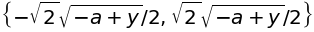

In [84]:
solveset(fx, x)

Note there are two solutions, and evaluating for $y=0$ gives the two roots of the quadratic function.

If you actually require the solution as a Sympy equation (`Eq` object), you can build the equations from the `FiniteSet` result:

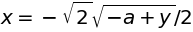

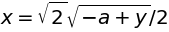

In [88]:
for f in solveset(fx, x):
    Eq(x, f)

## Solving Systems of Linear Equations

Linear systems of equations can be solved with `linsolve`. Future versions of SymPy plan to allow linear equations to be solved with `solveset`. There are three main ways to invoke `linsolve`:

## `linsolve` with List of Equations

In [89]:
x, y, z = symbols('x y z')

In [90]:
linsolve([x + y + z - 1, x + y + 2*z - 3 ], (x, y, z))

## `linsolve` with  Augmented Matrix

In [91]:
linsolve(Matrix(([1, 1, 1, 1], [1, 1, 2, 3])), (x, y, z))

## `linsolve` with $Ax=B$

In [92]:
M = Matrix(((1, 1, 1, 1), (1, 1, 2, 3)))
system = A, b = M[:, :-1], M[:, -1]
linsolve(system, x, y, z)

# References
* [SymPy](http://docs.sympy.org/latest/index.html)
* [Scientific Python Lectures](https://github.com/jrjohansson/scientific-python-lectures)